# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to HTML, all the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.

---
### Why We're Here

Photo sharing and photo storage services like to have location data for each photo that is uploaded. With the location data, these services can build advanced features, such as automatic suggestion of relevant tags or automatic photo organization, which help provide a compelling user experience. Although a photo's location can often be obtained by looking at the photo's metadata, many photos uploaded to these services will not have location metadata available. This can happen when, for example, the camera capturing the picture does not have GPS or if a photo's metadata is scrubbed due to privacy concerns.

If no location metadata for an image is available, one way to infer the location is to detect and classify a discernable landmark in the image. Given the large number of landmarks across the world and the immense volume of images that are uploaded to photo sharing services, using human judgement to classify these landmarks would not be feasible.

In this notebook, you will take the first steps towards addressing this problem by building models to automatically predict the location of the image based on any landmarks depicted in the image. At the end of this project, your code will accept any user-supplied image as input and suggest the top k most relevant landmarks from 50 possible landmarks from across the world. The image below displays a potential sample output of your finished project.

![Sample landmark classification output](images/sample_landmark_output.png)


### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Download Datasets and Install Python Modules
* [Step 1](#step1): Create a CNN to Classify Landmarks (from Scratch)
* [Step 2](#step2): Create a CNN to Classify Landmarks (using Transfer Learning)
* [Step 3](#step3): Write Your Landmark Prediction Algorithm

---
<a id='step0'></a>
## Step 0: Download Datasets and Install Python Modules

**Note: if you are using the Udacity workspace, *YOU CAN SKIP THIS STEP*. The dataset can be found in the `/data` folder and all required Python modules have been installed in the workspace.**

Download the [landmark dataset](https://udacity-dlnfd.s3-us-west-1.amazonaws.com/datasets/landmark_images.zip).
Unzip the folder and place it in this project's home directory, at the location `/landmark_images`.

Install the following Python modules:
* cv2
* matplotlib
* numpy
* PIL
* torch
* torchvision

In [3]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

In [4]:
# the train folder is splitted into train and valid
# import splitfolders
# output = splitfolders.ratio("/data/landmark_images/train", output="output", seed=1337, ratio=(.8, .2), group_prefix=None)

In [1]:
import os
os.listdir()

['.ipynb_checkpoints',
 'final_model_transfer_edited.pt',
 'ignore.pt',
 'images',
 'landmark.ipynb',
 'landmark_images',
 'model_scratch.pt',
 'output',
 'testing_images']

---

<a id='step1'></a>
## Step 1: Create a CNN to Classify Landmarks (from Scratch)

In this step, you will create a CNN that classifies landmarks.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 20%.

Although 20% may seem low at first glance, it seems more reasonable after realizing how difficult of a problem this is. Many times, an image that is taken at a landmark captures a fairly mundane image of an animal or plant, like in the following picture.

<img src="images/train/00.Haleakala_National_Park/084c2aa50d0a9249.jpg" alt="Bird in Haleakalā National Park" style="width: 400px;"/>

Just by looking at that image alone, would you have been able to guess that it was taken at the Haleakalā National Park in Hawaii?

An accuracy of 20% is significantly better than random guessing, which would provide an accuracy of just 2%. In Step 2 of this notebook, you will have the opportunity to greatly improve accuracy by using transfer learning to create a CNN.

Remember that practice is far ahead of theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

**Note**: Remember that the dataset can be found at `/data/landmark_images/` in the workspace.

All three of your data loaders should be accessible via a dictionary named `loaders_scratch`. Your train data loader should be at `loaders_scratch['train']`, your validation data loader should be at `loaders_scratch['valid']`, and your test data loader should be at `loaders_scratch['test']`.

You may find [this documentation on custom datasets](https://pytorch.org/docs/stable/torchvision/datasets.html#datasetfolder) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [6]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
import torchvision.transforms as transforms
import random

# transform tensors to images function 
tensor_to_img =  transforms.ToPILImage()


# Parameters
batch_size = 10
validation_prc = 0.2
num_workers = 0
resolution = 224
mean = torch.tensor([0.485, 0.456, 0.406])
std =  torch.tensor([0.229, 0.224, 0.225])



# Transform functions for each dataset 

train_transform = transforms.Compose([transforms.RandomRotation(degrees=(10)),
                                transforms.RandomResizedCrop(resolution),
                                transforms.RandomHorizontalFlip(p=0.35),
                                transforms.ToTensor(),
                                transforms.Normalize(mean, std)])

valid_transform = transforms.Compose([transforms.Resize((resolution, resolution), interpolation=Image.NEAREST),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean, std)])

test_transform = transforms.Compose([transforms.Resize((resolution, resolution), interpolation=Image.NEAREST),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean, std)])



# upload train and test images
train_images = datasets.ImageFolder(root="output/train", transform=train_transform)
valid_images = datasets.ImageFolder(root="output/val", transform=valid_transform)
test_images = datasets.ImageFolder(root="landmark_images/test", transform=test_transform)



# create data loaders for all three data sets 
train_loader = torch.utils.data.DataLoader(train_images, batch_size=batch_size,
    num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_images, batch_size=batch_size, 
    num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_images, batch_size=batch_size, 
    num_workers=num_workers, shuffle=True)

loaders_scratch = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}
print(len(train_images))
print(len(valid_images))
print(len(test_images))

3996
1000
1250


In [7]:
# Create images classes list 
import os
images_classes = sorted(os.listdir("/data/landmark_images/test"))
print(images_classes)

['00.Haleakala_National_Park', '01.Mount_Rainier_National_Park', '02.Ljubljana_Castle', '03.Dead_Sea', '04.Wroclaws_Dwarves', '05.London_Olympic_Stadium', '06.Niagara_Falls', '07.Stonehenge', '08.Grand_Canyon', '09.Golden_Gate_Bridge', '10.Edinburgh_Castle', '11.Mount_Rushmore_National_Memorial', '12.Kantanagar_Temple', '13.Yellowstone_National_Park', '14.Terminal_Tower', '15.Central_Park', '16.Eiffel_Tower', '17.Changdeokgung', '18.Delicate_Arch', '19.Vienna_City_Hall', '20.Matterhorn', '21.Taj_Mahal', '22.Moscow_Raceway', '23.Externsteine', '24.Soreq_Cave', '25.Banff_National_Park', '26.Pont_du_Gard', '27.Seattle_Japanese_Garden', '28.Sydney_Harbour_Bridge', '29.Petronas_Towers', '30.Brooklyn_Bridge', '31.Washington_Monument', '32.Hanging_Temple', '33.Sydney_Opera_House', '34.Great_Barrier_Reef', '35.Monumento_a_la_Revolucion', '36.Badlands_National_Park', '37.Atomium', '38.Forth_Bridge', '39.Gateway_of_India', '40.Stockholm_City_Hall', '41.Machu_Picchu', '42.Death_Valley_National_Pa

**Question 1:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

**Answer**: 

After inspecting some images in the dataset given, few observations were taken:
- The images is taken randomly from different angles and rotations. 
- The size of the images varies from picture to another indicating that the pictures were collected randomly from different sources.
- Some pictures didnt inculde the landmark itself, but includes signs, selfies or the landmark was not the most highlighted feature in the image.

Therefore based on those observations, the following steps were taken: 
- The pictures size chosen was 224, because of the lack of the accuracy in the datasets I did not want to decrease the size too much so that some important features might be wasted. 
- The size (224,224,3) is the same size VGG16 used in there model, and since I mimic there design in my CNN layers It seemed right to follow it.
- RnadomSizedCrop is used to help the model later generalize from different angles of the landmark since the pictures didnt inculde the full landmarks in all images given. 
- Augmentation methods are applied due to the irregularities in the training images stated above, the augmentations methods used inculded: 
             1. RandomRotation to help the model learn since some pictures or selfies from the landmarks can be taken with angles. 
             2. RandomHorizontalFlip to help generalize to different angles of taken the picture (ex back camera, front) 



### (IMPLEMENTATION) Visualize a Batch of Training Data

Use the code cell below to retrieve a batch of images from your train data loader, display at least 5 images simultaneously, and label each displayed image with its class name (e.g., "Golden Gate Bridge").

Visualizing the output of your data loader is a great way to ensure that your data loading and preprocessing are working as expected.

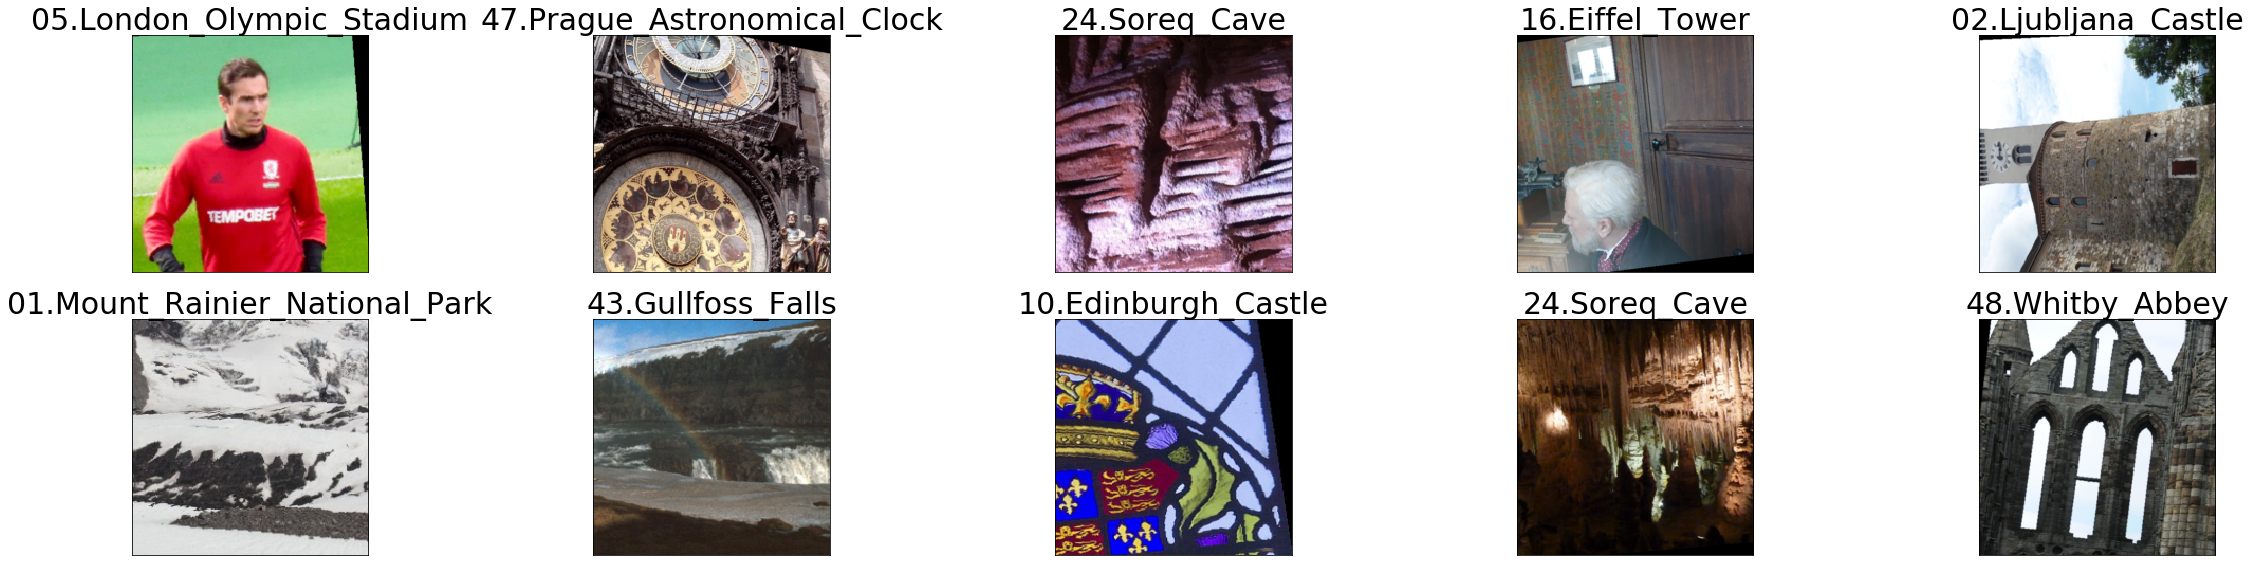

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

## visualize a batch of the train data loader

dataiter = iter(loaders_scratch["train"])
images, labels = next(dataiter)
# Reversing the normlization to view the data
images = images * std[:, None, None] + mean[:, None, None]

fig = plt.figure(figsize=(40, 20))
for idx in range(batch_size):
    ax = fig.add_subplot(4, 10/2, idx+1, xticks=[], yticks=[])
    ax.imshow(tensor_to_img(images[idx]))
    ax.set_title(images_classes[labels[idx]], fontsize=30)


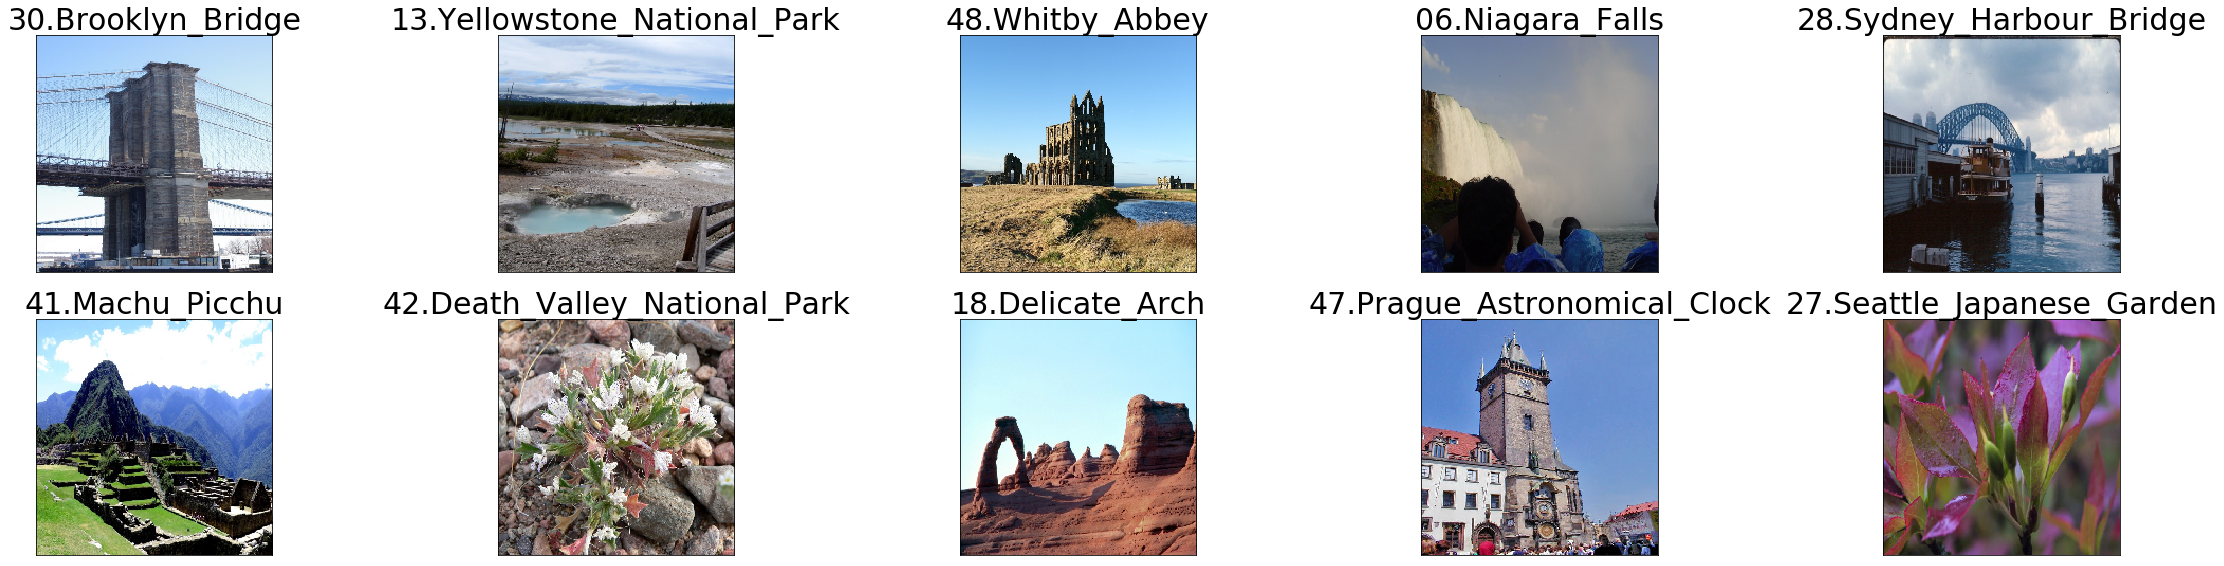

In [9]:
##  visualize a batch of the valid data loader

dataiter = iter(loaders_scratch["valid"])
images, labels = next(dataiter)
# Reversing the normlization to view the data
images = images * std[:, None, None] + mean[:, None, None]

fig = plt.figure(figsize=(40, 20))
for idx in range(batch_size):
    ax = fig.add_subplot(4, 10/2, idx+1, xticks=[], yticks=[])
    ax.imshow(tensor_to_img(images[idx]))
    ax.set_title(images_classes[labels[idx]], fontsize=30)

### Initialize use_cuda variable

In [10]:
# useful variable that tells us whether we should use the GPU
use_cuda = torch.cuda.is_available()
use_cuda

True

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and fill in the function `get_optimizer_scratch` below.

In [9]:
## TODO: select loss function
import torch.optim as optim
import torch.nn as nn


criterion_scratch = nn.CrossEntropyLoss()

def get_optimizer_scratch(model):
    ## TODO: select and return an optimizer
    return optim.SGD(model.parameters(), lr=0.0065, momentum =0.5)
    
    

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify images of landmarks.  Use the template in the code cell below.

In [10]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ## TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
        self.conv2 = nn.Conv2d(64, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)

        
        self.pool = nn.MaxPool2d(2, 2)
        
        # Fully-connected layers 
        self.fc1 = nn.Linear(28*28*128, 1024)
        self.fc2 = nn.Linear(1024, len(images_classes))
        self.dropout = nn.Dropout(0.3)
        
    
    def forward(self, x):
        ## Define forward behavior
        x = F.relu(self.conv1(x))
        x = self.dropout(x)
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.dropout(x)
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.dropout(x)
        x = self.pool(x)
        x = x.view(-1, 28*28*128)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x

#-#-# Do NOT modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()
model_scratch

Net(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=100352, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=50, bias=True)
  (dropout): Dropout(p=0.3)
)

__Question 2:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__  

- A general steps in choosing the CNN layers inculded: 
1. Choosing a famous classic (VGG16 in my case) as reference for how the general structure should be. 
2. The model depth should be increasing as the CNN layers get deeper so the network will extract more and more specific feature going forward. 
3. The number of model parameters at after each layer (activation size) should decreasing going from section to section. 

Based on the above rules, the following steps were taken: 
1. The structure of the CNN at first was chosen to be in the following order (CNN-CNN-MaxPooling) in which after each section the width and height is divided by 2. 
2. 3 different layers sections (CNN-CNN-MaxPooling) is chosen for this project. the insppiration at first was taken from VGG16 model. 
3. different depth were used for each section, 64-128-256, 32-64-128 were tested.However, the memory allocation for the project both in the workspace and my pc couldnt handle all parameters.
4. A  reduction in number of CNN layers used is each section is applied to transform to (CNN-MaxPooling) instead of (CNN-CNN-MaxPooling). 
5. Finally, After experimentation with different layer depths for the 3 CNN layers used. A suitable and reasonably structure that give a Satisfactory peformance above the needed was found to be: 
          - 64-64-128 for the depth of CNN layers. 
          - 2 fully connected layers were used. 
          - A SGD optimizer with increasing the Ir to 0.0065 and adding momentum =0.5 was found to give a suitable and fast converging rate.  


### (IMPLEMENTATION) Implement the Training Algorithm

Implement your training algorithm in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at the filepath stored in the variable `save_path`.

In [11]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        index = 0
        ###################
        # train the model #
        ###################
        # set the module to training mode
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            optimizer.zero_grad()
            # forward step
            output = model(data)
            loss = criterion(output, target)
            # backward step
            loss.backward()
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))
            
        

        ######################    
        # validate the model #
        ######################
        # set the model to evaluation mode
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## TODO: update average validation loss 
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - valid_loss))
            
        
         
            

        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))

        ## TODO: if the validation loss has decreased, save the model at the filepath stored in save_path
        
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
        
        
    return model

### (IMPLEMENTATION) Experiment with the Weight Initialization

Use the code cell below to define a custom weight initialization, and then train with your weight initialization for a few epochs. Make sure that neither the training loss nor validation loss is `nan`.

Later on, you will be able to see how this compares to training with PyTorch's default weight initialization.

In [20]:
def custom_weight_init(m):
    
    classname = m.__class__.__name__
    
    if classname.find('Linear') != -1:
        # get the number of the inputs
        n = m.in_features
        y = 1.0/np.sqrt(n)
        m.weight.data.normal_(0, y)
        m.bias.data.fill_(0)
        

#-#-# Do NOT modify the code below this line. #-#-#
    
model_scratch.apply(custom_weight_init)
model_scratch = train(10, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch),
                      criterion_scratch, use_cuda, 'ignore.pt')

Epoch: 1 	Training Loss: 3.832689 	Validation Loss: 3.796264
Validation loss decreased (inf --> 3.796264).  Saving model ...
Epoch: 2 	Training Loss: 3.609869 	Validation Loss: 3.621602
Validation loss decreased (3.796264 --> 3.621602).  Saving model ...
Epoch: 3 	Training Loss: 3.436553 	Validation Loss: 3.488421
Validation loss decreased (3.621602 --> 3.488421).  Saving model ...
Epoch: 4 	Training Loss: 3.308617 	Validation Loss: 3.388261
Validation loss decreased (3.488421 --> 3.388261).  Saving model ...
Epoch: 5 	Training Loss: 3.209181 	Validation Loss: 3.313021
Validation loss decreased (3.388261 --> 3.313021).  Saving model ...
Epoch: 6 	Training Loss: 3.092905 	Validation Loss: 3.213770
Validation loss decreased (3.313021 --> 3.213770).  Saving model ...
Epoch: 7 	Training Loss: 2.999981 	Validation Loss: 3.115747
Validation loss decreased (3.213770 --> 3.115747).  Saving model ...
Epoch: 8 	Training Loss: 2.923609 	Validation Loss: 3.085918
Validation loss decreased (3.11574

### (IMPLEMENTATION) Train and Validate the Model

Run the next code cell to train your model.

In [13]:
## TODO: you may change the number of epochs if you'd like,
## but changing it is not required
num_epochs = 70

#-#-# Do NOT modify the code below this line. #-#-#

# function to re-initialize a model with pytorch's default weight initialization
def default_weight_init(m):
    reset_parameters = getattr(m, 'reset_parameters', None)
    if callable(reset_parameters):
        m.reset_parameters()

# reset the model parameters
model_scratch.apply(default_weight_init)

# train the model
model_scratch = train(num_epochs, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch), 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch: 1 	Training Loss: 3.826764 	Validation Loss: 3.750841
Validation loss decreased (inf --> 3.750841).  Saving model ...
Epoch: 2 	Training Loss: 3.631069 	Validation Loss: 3.621640
Validation loss decreased (3.750841 --> 3.621640).  Saving model ...
Epoch: 3 	Training Loss: 3.490768 	Validation Loss: 3.524619
Validation loss decreased (3.621640 --> 3.524619).  Saving model ...
Epoch: 4 	Training Loss: 3.377085 	Validation Loss: 3.561578
Epoch: 5 	Training Loss: 3.253711 	Validation Loss: 3.370312
Validation loss decreased (3.524619 --> 3.370312).  Saving model ...
Epoch: 6 	Training Loss: 3.179148 	Validation Loss: 3.322814
Validation loss decreased (3.370312 --> 3.322814).  Saving model ...
Epoch: 7 	Training Loss: 3.080552 	Validation Loss: 3.199548
Validation loss decreased (3.322814 --> 3.199548).  Saving model ...
Epoch: 8 	Training Loss: 3.001621 	Validation Loss: 3.211033
Epoch: 9 	Training Loss: 2.943892 	Validation Loss: 3.053465
Validation loss decreased (3.199548 --> 3.

### (IMPLEMENTATION) Test the Model

Run the code cell below to try out your model on the test dataset of landmark images. Run the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 20%.

In [14]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    # set the module to evaluation mode
    model.eval()

    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.167797


Test Accuracy: 45% (567/1250)


---
<a id='step2'></a>
## Step 2: Create a CNN to Classify Landmarks (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify landmarks from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

All three of your data loaders should be accessible via a dictionary named `loaders_transfer`. Your train data loader should be at `loaders_transfer['train']`, your validation data loader should be at `loaders_transfer['valid']`, and your test data loader should be at `loaders_transfer['test']`.

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [13]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

loaders_transfer = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}



### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_transfer`, and fill in the function `get_optimizer_transfer` below.

In [14]:
## TODO: select loss function
import torch.optim as optim
import torch.nn as nn


criterion_transfer = nn.CrossEntropyLoss()

def get_optimizer_transfer(model_section):
    ## TODO: select and return an optimizer
    return optim.SGD(model_section.parameters(), lr=0.005, momentum =0.5)

    
    

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify images of landmarks.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [15]:
## TODO: Specify model architecture
from torchvision import models
import torch.nn as nn

# apply a flattening step since the flattening step in Resnet34 module  will be removed when applying nn.Sequential to create the model
class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)

def create_model(): 
    # download the model Resnet34
    model_transfer = models.resnet34(pretrained=True)
    print(f" Resnet34 is divided to {len(list(model_transfer.children()))} sections")
    # take all CNN layers except layer 4
    CNN_modules = list(model_transfer.children())[:7]
    # add the last Maxpooling layer before the fc layer
    CNN_modules.append(list(model_transfer.children())[8])
    # The last Fc layer
    last_layer = list(model_transfer.children())[-1]
    # Combine all sections together and adding the Flatten step
    model_transfer = nn.Sequential(
                                *CNN_modules, 
                                Flatten(),
                                last_layer)
    
    
    # Freeze training for some spesific sections (all layers except layer 3 and Fc layer)
    index_freeze = 5 # index of the last layer in resnet model for freezing parameters 
    index = 0
    for section in list(model_transfer.children()):
        if index <= index_freeze: 
            for param in section.parameters(): 
                param.requires_grad = False
        else: 
            break
        index += 1
        
    fc_inputs = 16384 # number of inputs to Fc layer after Layer3
    model_transfer[9] = nn.Linear(in_features=fc_inputs, out_features=len(images_classes))
    return model_transfer

model_transfer = create_model()   

if use_cuda:
    model_transfer = model_transfer.cuda()
    
model_transfer

 Resnet34 is divided to 10 sections


Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, ker

__Question 3:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__  

- The model to be used was the first thing to choose. At the end, ResNets34 is chosen for several reasons: 
 1. Resnet is significantly smaller size and has less parameters than other famous models like VGG16 which might become an issue due to limited space in the workspace provided.  
 2. Resnet has a very high accuracy. 
 3. Based on my reading Resnet was way faster than other models (reference: https://stats.stackexchange.com/questions/280179/why-is-resnet-faster-than-vgg/280338)
 
 - After choosing the model, steps were taken to reach the final model: 
 1. Since our data is small (4000+) compared to the data used to train Resnet 34 (1 Million) and that both data are different. The strategy was to add final Fc layer and slicing off some of the Conv layers. 
 2. Resnet34 has 4 main layers, different strategies were tested by slicing off different layers (ex. layer 4 and 3, or all layers except 1 etc...). 
 3. Finally, the best strategy was to slice layer 4, freeze all parameters for all layers except layer 3 and the fc final layer, and train the model. 
 
 - An accuracy of 77% is reached using this model which is above the needed for this project. 
 
 
 ### Other References
 - https://towardsdatascience.com/understanding-and-visualizing-resnets-442284831be8
 - K. He, X. Zhang, S. Ren and J. Sun, “Deep Residual Learning for Image Recognition,” in CVPR, 2016.

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [16]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        index = 0
        ###################
        # train the model #
        ###################
        # set the module to training mode
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## TODO: find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))

            optimizer.zero_grad()
            
            output = model(data)
            loss = criterion(output, target)
            
            loss.backward()
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))
            
            

            
            

        ######################    
        # validate the model #
        ######################
        # set the model to evaluation mode
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## TODO: update average validation loss 
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - valid_loss))
            
        
         
            

        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))

        ## TODO: if the validation loss has decreased, save the model at the filepath stored in save_path
        
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
        
        
    return model

In [18]:
### This part is commented out after training to only load the model and proceed to next steps 
# # TODO: train the model and save the best model parameters at filepath 'model_transfer.pt'
# num_epochs = 75
# model_transfer = train(num_epochs, loaders_transfer, model_transfer, get_optimizer_transfer(model_transfer[6:]), 
#                       criterion_transfer, use_cuda, 'final_model_transfer_edited.pt')


#-#-# Do NOT modify the code below this line. #-#-#

# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('final_model_transfer_edited.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of landmark images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [19]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    # set the module to evaluation mode
    model.eval()

    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))
    
    
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.914914


Test Accuracy: 77% (969/1250)


---
<a id='step3'></a>
## Step 3: Write Your Landmark Prediction Algorithm

Great job creating your CNN models! Now that you have put in all the hard work of creating accurate classifiers, let's define some functions to make it easy for others to use your classifiers.

### (IMPLEMENTATION) Write Your Algorithm, Part 1

Implement the function `predict_landmarks`, which accepts a file path to an image and an integer k, and then predicts the **top k most likely landmarks**. You are **required** to use your transfer learned CNN from Step 2 to predict the landmarks.

An example of the expected behavior of `predict_landmarks`:
```
>>> predicted_landmarks = predict_landmarks('example_image.jpg', 3)
>>> print(predicted_landmarks)
['Golden Gate Bridge', 'Brooklyn Bridge', 'Sydney Harbour Bridge']
```

In [59]:
import cv2
from PIL import Image
import torch.nn.functional as F

## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)

image_transform = transforms.Compose([transforms.Resize((resolution, resolution), interpolation=Image.NEAREST),
                                transforms.ToTensor(),
                                transforms.Normalize(mean, std)])
    
def predict_landmarks(img_path, k):
    ## TODO: return the names of the top k landmarks predicted by the transfer learned CNN
    img = Image.open(img_path)
    img_tensor = image_transform(img)
    if use_cuda:
            img_tensor =  img_tensor.cuda()
    output = F.softmax(model_transfer(img_tensor.unsqueeze_(0))).squeeze().tolist()
    # find highest numbers and there indices 
    pred_dic = {}
    max_pred_list = []
    indices_pred = []
    for i in range(k):
        max_pred_list.append(max(output))
        indices_pred.append(output.index(max_pred_list[-1]))
        output.remove(max_pred_list[-1])
    # pred_dic is made for my reference to check the probabilities values as well 
    pred_dic = {i:{"pred":max_pred_list[i], "class_index":indices_pred[i]} for i in range(k)}
        
    return pred_dic
    


# test on a sample image
(predict_landmarks('images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg', 5))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


{0: {'pred': 0.9606791138648987, 'class_index': 9},
 1: {'pred': 0.0393076129257679, 'class_index': 37},
 2: {'pred': 1.2508012332546059e-05, 'class_index': 29},
 3: {'pred': 4.4869312887385604e-07, 'class_index': 15},
 4: {'pred': 2.0547174983676086e-07, 'class_index': 3}}

### (IMPLEMENTATION) Write Your Algorithm, Part 2

In the code cell below, implement the function `suggest_locations`, which accepts a file path to an image as input, and then displays the image and the **top 3 most likely landmarks** as predicted by `predict_landmarks`.

Some sample output for `suggest_locations` is provided below, but feel free to design your own user experience!
![](images/sample_landmark_output.png)

Is this is your place: 
 Golden_Gate_Bridge or Atomium or Petronas_Towers? 


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


{0: {'pred': 0.9606791138648987,
  'class_index': 9,
  'landmark': '09.Golden_Gate_Bridge'},
 1: {'pred': 0.0393076129257679, 'class_index': 37, 'landmark': '37.Atomium'},
 2: {'pred': 1.2508012332546059e-05,
  'class_index': 29,
  'landmark': '29.Petronas_Towers'}}

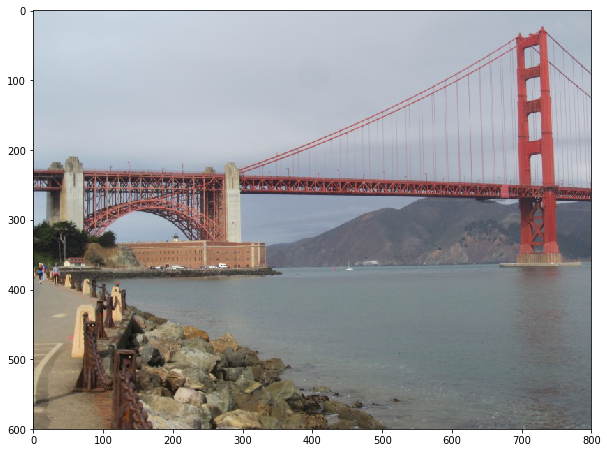

In [71]:
def suggest_locations(img_path, k):
    # get landmark predictions
    img = Image.open(img_path)
    fig = plt.figure(figsize=(10, 20))
    ax = fig.add_subplot(111)
    ax.imshow(img)
    predicted_landmarks_dict = predict_landmarks(img_path, k)
    ## TODO: display image and display landmark predictions

    landmarks_string = ""
    for i in range(k):
        predicted_landmarks_dict[i]["landmark"] = landmark = images_classes[predicted_landmarks_dict[i]["class_index"]]
        if i != k - 1: 
            landmarks_string += landmark[3:] + " or "
        else: 
            landmarks_string += landmark[3:] + "?"
    print(f"Is this is your place: \n {landmarks_string} " )
    return predicted_landmarks_dict
        
        
    

    
    

# test on a sample image
suggest_locations('images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg', 3)

### (IMPLEMENTATION) Test Your Algorithm

Test your algorithm by running the `suggest_locations` function on at least four images on your computer. Feel free to use any images you like.

__Question 4:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

1. Adding more augmentation to the training images (ex. vertical flip, more rotation).
2. Adding more images, or apply the augmentation and save different versions of the image (augmentation and original) so the model generalize better.
3. For the algorithm, a simple tkinter app can be added or a multi pictures prediction can be added to enhance the prediction algorithm.

Is this is your place: 
 Petronas_Towers or Terminal_Tower or Petronas_Towers? 


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


{0: {'pred': 0.5188577771186829,
  'class_index': 29,
  'landmark': '29.Petronas_Towers'},
 1: {'pred': 0.22096124291419983,
  'class_index': 14,
  'landmark': '14.Terminal_Tower'},
 2: {'pred': 0.0909980833530426,
  'class_index': 29,
  'landmark': '29.Petronas_Towers'}}

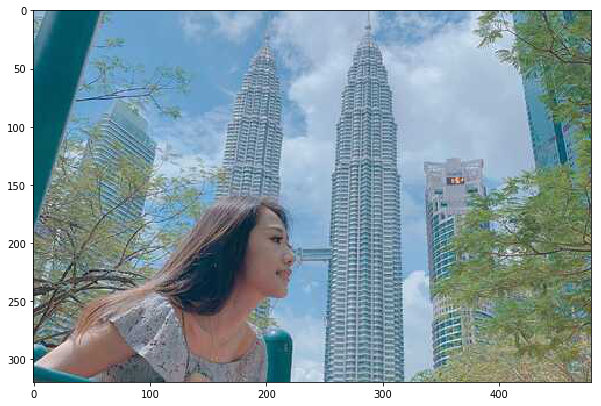

In [73]:
suggest_locations('testing_images/petronas_towers.jpg', 3)

Is this is your place: 
 Petronas_Towers or Brooklyn_Bridge or Terminal_Tower? 


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


{0: {'pred': 0.45406636595726013,
  'class_index': 29,
  'landmark': '29.Petronas_Towers'},
 1: {'pred': 0.13509288430213928,
  'class_index': 30,
  'landmark': '30.Brooklyn_Bridge'},
 2: {'pred': 0.13110175728797913,
  'class_index': 14,
  'landmark': '14.Terminal_Tower'}}

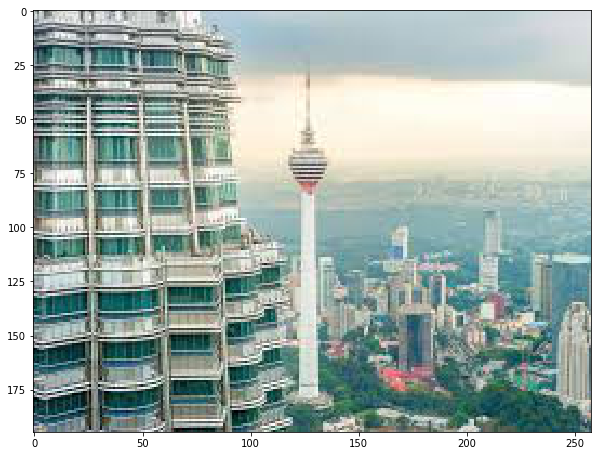

In [74]:
suggest_locations('testing_images/petronas_towers2.jpg', 3)

Is this is your place: 
 Eiffel_Tower or Seattle_Japanese_Garden or Central_Park? 


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


{0: {'pred': 0.6048234701156616,
  'class_index': 16,
  'landmark': '16.Eiffel_Tower'},
 1: {'pred': 0.31160199642181396,
  'class_index': 27,
  'landmark': '27.Seattle_Japanese_Garden'},
 2: {'pred': 0.036875296384096146,
  'class_index': 15,
  'landmark': '15.Central_Park'}}

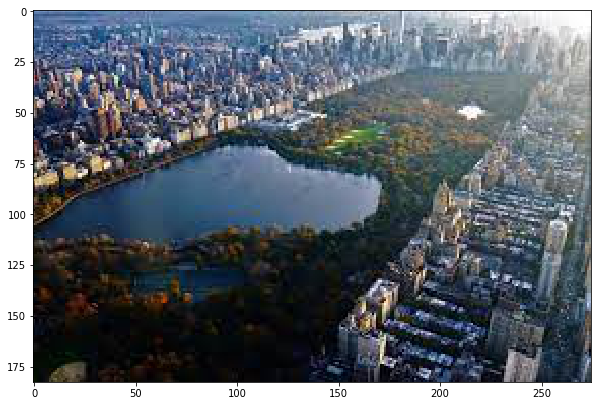

In [81]:
suggest_locations('testing_images/central_park.jpg', 3)

Is this is your place: 
 Central_Park or Brooklyn_Bridge or Delicate_Arch? 


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


{0: {'pred': 0.4898013770580292,
  'class_index': 15,
  'landmark': '15.Central_Park'},
 1: {'pred': 0.2646734118461609,
  'class_index': 30,
  'landmark': '30.Brooklyn_Bridge'},
 2: {'pred': 0.06306026130914688,
  'class_index': 18,
  'landmark': '18.Delicate_Arch'}}

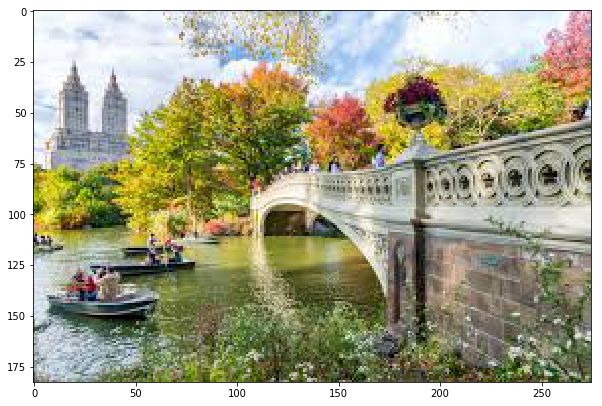

In [83]:
suggest_locations('testing_images/central_park2.jpg', 3)

Is this is your place: 
 Banff_National_Park or Temple_of_Heaven or Grand_Canyon? 


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


{0: {'pred': 0.6963595151901245,
  'class_index': 25,
  'landmark': '25.Banff_National_Park'},
 1: {'pred': 0.1528451293706894,
  'class_index': 45,
  'landmark': '45.Temple_of_Heaven'},
 2: {'pred': 0.07138246297836304,
  'class_index': 8,
  'landmark': '08.Grand_Canyon'}}

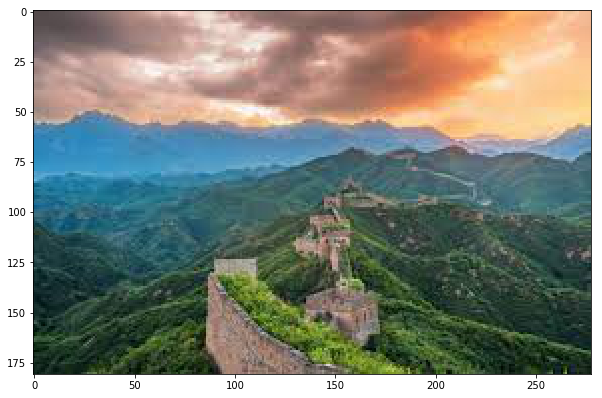

In [80]:
suggest_locations('testing_images/great_wall.jpg', 3)

Is this is your place: 
 Forth_Bridge or Golden_Gate_Bridge or Central_Park? 


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


{0: {'pred': 0.9991670846939087,
  'class_index': 38,
  'landmark': '38.Forth_Bridge'},
 1: {'pred': 0.0008328745607286692,
  'class_index': 9,
  'landmark': '09.Golden_Gate_Bridge'},
 2: {'pred': 1.300359144806862e-07,
  'class_index': 15,
  'landmark': '15.Central_Park'}}

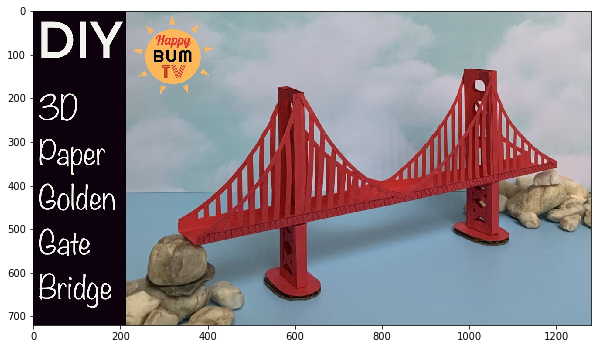

In [84]:
suggest_locations('testing_images/golden_gate_bridge.jpg', 3)

Is this is your place: 
 Washington_Monument or Eiffel_Tower or Terminal_Tower? 


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


{0: {'pred': 0.988012433052063,
  'class_index': 31,
  'landmark': '31.Washington_Monument'},
 1: {'pred': 0.008130913600325584,
  'class_index': 16,
  'landmark': '16.Eiffel_Tower'},
 2: {'pred': 0.001208883710205555,
  'class_index': 14,
  'landmark': '14.Terminal_Tower'}}

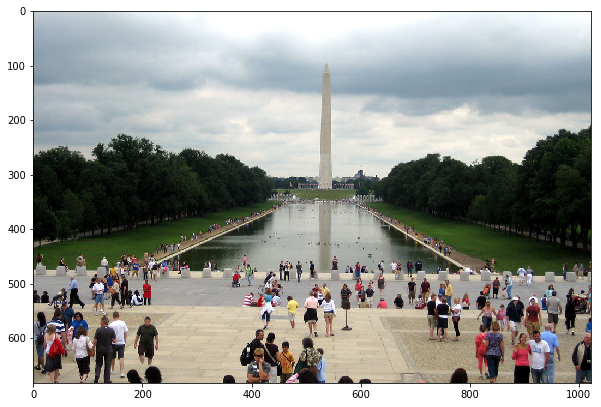

In [90]:
suggest_locations('testing_images/W_mon.jpg', 3)